# Data Preprocessing 

The first thing that we need to do, like always inputting the data. We do this by importing *numpy* and *pandas* first. 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import seaborn as sns
import matplotlib.pyplot as plt

/kaggle/input/fifa19/data.csv


And then, we see at what might wrong with the data, that might stumble us during the process of analysis. In order to find the problems, we have to see at the data through. 

In [2]:
data = pd.read_csv('/kaggle/input/fifa19/data.csv')
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


We see that there is a problem with the name of the columns. 
1. The first letter of each column's names is a capital letter. 
2. Also if the name of the columns consist of two words, they would be seperated by a *space* instead of *underscore*. 

This is quite uncommon and might make the preprocessing and analysis a little more annoying. 

In [3]:
data.columns = [c.lower().replace(' ', '_') for c in data.columns]

Now, we will see through at the names of the columns that we just transformed.

In [4]:
data.columns

Index(['unnamed:_0', 'id', 'name', 'age', 'photo', 'nationality', 'flag',
       'overall', 'potential', 'club', 'club_logo', 'value', 'wage', 'special',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'body_type', 'real_face', 'position',
       'jersey_number', 'joined', 'loaned_from', 'contract_valid_until',
       'height', 'weight', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw',
       'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'crossing',
       'finishing', 'headingaccuracy', 'shortpassing', 'volleys', 'dribbling',
       'curve', 'fkaccuracy', 'longpassing', 'ballcontrol', 'acceleration',
       'sprintspeed', 'agility', 'reactions', 'balance', 'shotpower',
       'jumping', 'stamina', 'strength', 'longshots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'composure',
       'marking', 'standingtackle', 'slidingt

Those names seems fine. Now we can move on.

Now, we will be seeing if there is some NaN data at the dataset. But remember, we are not going to use all the data that we have here. So, we just need to know what columns that we need and check whether we have NaN values on them or not. 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   unnamed:_0                18207 non-null  int64  
 1   id                        18207 non-null  int64  
 2   name                      18207 non-null  object 
 3   age                       18207 non-null  int64  
 4   photo                     18207 non-null  object 
 5   nationality               18207 non-null  object 
 6   flag                      18207 non-null  object 
 7   overall                   18207 non-null  int64  
 8   potential                 18207 non-null  int64  
 9   club                      17966 non-null  object 
 10  club_logo                 18207 non-null  object 
 11  value                     18207 non-null  object 
 12  wage                      18207 non-null  object 
 13  special                   18207 non-null  int64  
 14  prefer

The column '*Position*', which is a column located at number 21 is something that we need along the analysis. But at the same time, there are some data missing there. Then, to simplify the process I just decide to drop the rows with the missing values at the '*position*' column.

In [6]:
data = data.dropna(subset=['position'])

Like what it was mentioned before, not every data is going to be used along the analysis. Right now, we will drop these columns that we consider not important. Also, in this data, we have values of each specific skills (acceleration, jumping, agility etc.) but we actually can still group these skills. We will use the group that exist at the internet (You can find them easily).

**Pace**        
1. acceleration
2. sprintspeed

**Shooting**
1. finishing
2. volleys
3. shotpower
4. longshots
5. positioning
6. penalties

**Passing**
1. crossing
2. shortpassing
3. longpassing
4. vision
5. fkaccuracy
6. curve

**Dribble**
1. agility
2. balance
3. reactions
4. dribbling
5. composure
6. ballcontrol

**Defense**
1. interceptions
2. marking
3. standingtackle
4. slidingtackle
5. headingaccuracy

**Physical**
1. jumping
2. stamina
3. strength
4. aggression

**Goalkeeping**
1. gkdiving
2. gkhandling
3. gkkicking
4. gkpositioning
5. gkreflexes

These grouped skills have the value of their respective specific skills. 

In [7]:
del_cols    = ['photo', 'flag', 'club_logo', 'special', 'real_face', 'jersey_number']
data        = data.drop(del_cols, axis=1)

positions   = ['position']

central_back         = ['lcb', 'cb', 'rcb']
wing_back            = ['rb', 'rwb', 'lb', 'lwb']
central_midfielder   = ['lcm', 'cm', 'rcm', 'ldm', 'cdm', 'rdm']
attacking_midfielder = ['lam', 'cam', 'ram', 'lm', 'rm']
forward              = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw']

physique    = ['preferred_foot', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'height', 'weight']

pace        = ['acceleration', 'sprintspeed']
shooting    = ['finishing', 'volleys', 'shotpower', 'longshots', 'positioning', 'penalties']
passing     = ['crossing', 'shortpassing', 'longpassing', 'vision', 'fkaccuracy', 'curve']
dribble     = ['agility', 'balance', 'reactions', 'dribbling', 'composure', 'ballcontrol']
defense     = ['interceptions', 'marking', 'standingtackle', 'slidingtackle', 'headingaccuracy']
physical    = ['jumping', 'stamina', 'strength', 'aggression']
goalkeeping = ['gkdiving', 'gkhandling', 'gkkicking', 'gkpositioning', 'gkreflexes']
finance     = ['value', 'wage', 'overall', 'potential', 'international_reputation', 'release_clause']

skills      = ['crossing', 'finishing', 'headingaccuracy', 'shortpassing', 'volleys', 'dribbling', 
               'curve', 'fkaccuracy', 'longpassing', 'ballcontrol', 'acceleration', 'sprintspeed',
               'agility', 'reactions', 'balance', 'shotpower', 'jumping', 'stamina', 'strength',
               'longshots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
               'composure', 'marking', 'standingtackle', 'slidingtackle', 'gkdiving', 'gkhandling',
               'gkkicking', 'gkpositioning', 'gkreflexes']

In [8]:
skillset = [pace, shooting, passing, dribble, defense,
            physical, goalkeeping]
skill_names = ['pace', 'shooting', 'passing', 'dribble',
               'defense', 'physical', 'goalkeeping']

for ss, sn in zip(skillset, skill_names):
    data[sn] = list(np.transpose(data[ss]).mean())
    
data.position = [str(x).lower() for x in data.position]

Not only grouping the skills, I think we also need to group the positions as well. 

In [9]:
def spec_position(pos):
    if pos in central_back:
        spec = 'central_back'
    elif pos in wing_back:
        spec = 'wing_back'
    elif pos in central_midfielder:
        spec = 'central_midfielder'
    elif pos in attacking_midfielder:
        spec = 'attacking_midfielder'
    elif pos in forward:
        spec = 'forward'
    else:
        spec = 'goalkeeper'
    return spec

a = pd.DataFrame([spec_position(x) for x in data.position], columns=['spec_position'])
data = pd.concat([data, a], axis=1)

## Explarotary Data Analysis (EDA)

In this Explarotary Data Analysis section, we focus on finding the most important skills for each position. After finding it, it will help us on considering the best features for a new talent.

In [10]:
def get_data_on_position(pos, n):
    data_used = data[(data.position == pos)].sort_values('overall', ascending=False)[skills].head(n)
    return data_used

def get_data_on_spec_position(spec, n):
    data_used = data[(data.spec_position == spec)].sort_values('overall', ascending=False)[skills].head(n)
    return data_used

def plot_best_skillsets(data_used):
    for j, k in zip(skill_names, skillset):
        a = np.array(data_used[k])
        ma = []
        for i in range(len(a)):
            ma.append(a[i, :].mean())
        data_used[j] = ma
    data_plot = data_used[skill_names].melt().rename(columns={'variable':'skillset'}) 
    sns.catplot(kind='box', data=data_plot, x='skillset', y='value')
    plt.xticks(rotation=45)
    
def plot_best_skills(s_set, s_names, data_used):
    data_used_ = {}
    for ss, sn in zip(s_set, s_names):
        data_used_[sn] = data_used[ss].melt().rename(columns={'variable':'skill'})
    fig, axes = plt.subplots(3, 1, figsize=(8, 12))
    sns.boxplot(data=data_used_[s_names[0]], x='skill', y='value', ax=axes[0])
    axes[0].set_title(s_names[0])
    sns.boxplot(data=data_used_[s_names[1]], x='skill', y='value', ax=axes[1])
    axes[1].set_title(s_names[1])
    sns.boxplot(data=data_used_[s_names[2]], x='skill', y='value', ax=axes[2])
    axes[2].set_title(s_names[2])
    plt.subplots_adjust(hspace=0.5)
    
def plot_best_skills_2(s_set, s_names, data_used):
    data_used_ = {}
    for ss, sn in zip(s_set, s_names):
        data_used_[sn] = data_used[ss].melt().rename(columns={'variable':'skill'})
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    sns.boxplot(data=data_used_[s_names[0]], x='skill', y='value', ax=axes[0, 0])
    axes[0, 0].set_title(s_names[0])
    sns.boxplot(data=data_used_[s_names[1]], x='skill', y='value', ax=axes[0, 1])
    axes[0, 1].set_title(s_names[1])
    sns.boxplot(data=data_used_[s_names[2]], x='skill', y='value', ax=axes[1, 0])
    axes[1, 0].set_title(s_names[2])
    sns.boxplot(data=data_used_[s_names[3]], x='skill', y='value', ax=axes[1, 1])
    axes[1, 1].set_title(s_names[3])
    plt.subplots_adjust(hspace=0.2)

## Goalkeeper

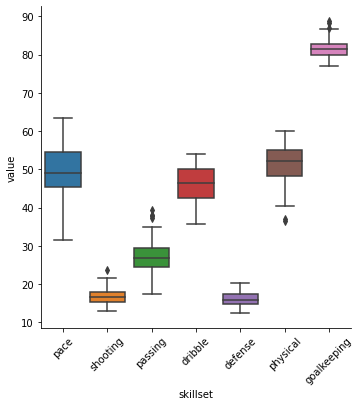

In [11]:
df_goalkeeper = get_data_on_spec_position('goalkeeper', 50)
plot_best_skillsets(df_goalkeeper)

For being a goalkeeper, we can see from the graph above that the only thing that a player need is goalkeeping skills. 

## Central Back

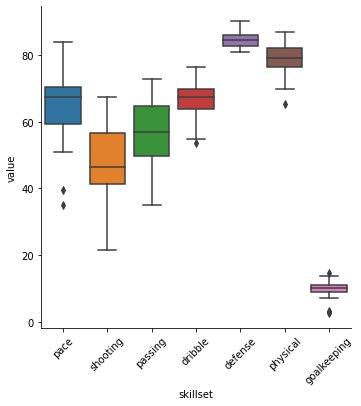

In [12]:
df_cb = get_data_on_spec_position('central_back', 50)
plot_best_skillsets(df_cb)

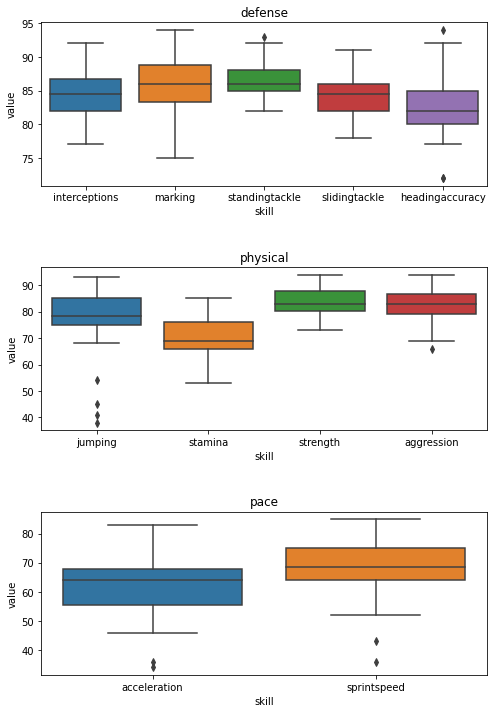

In [13]:
skillset_1 = [defense, physical, pace]
skillname_1 = ['defense', 'physical', 'pace']

plot_best_skills(skillset_1, skillname_1, df_cb)

We can see from the data above, that the most important skills for a defender is their **defending skills** and their **physical**. Maybe they need pace to catch up with quick front player of the opponent, but it's not their specialization. 

## Wing Back

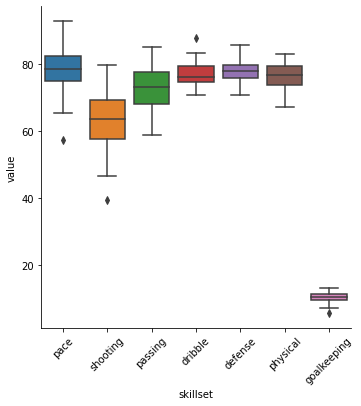

In [14]:
df_wb = get_data_on_spec_position('wing_back', 50)
plot_best_skillsets(df_wb)

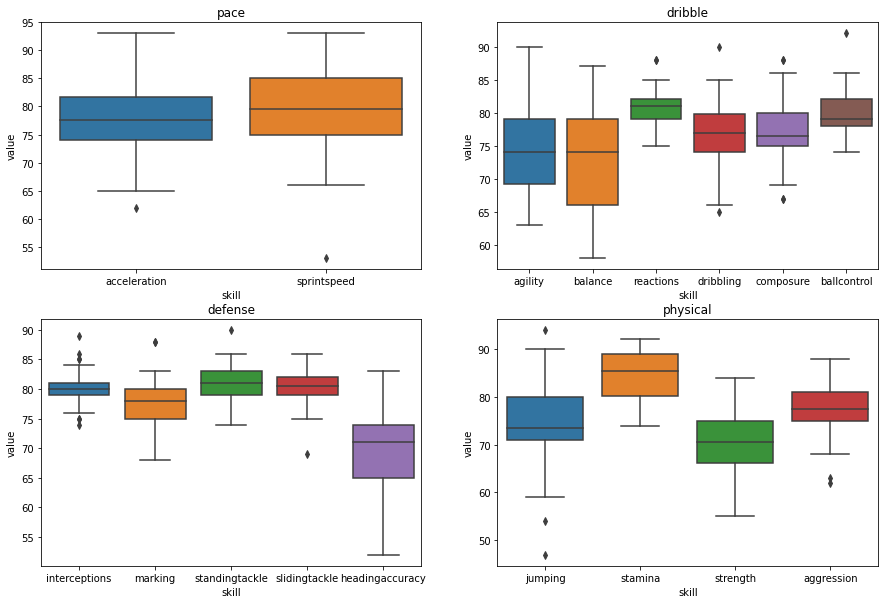

In [15]:
skillset_1 = [pace, dribble, defense, physical]
skillname_1 = ['pace', 'dribble', 'defense', 'physical']

plot_best_skills_2(skillset_1, skillname_1, df_wb)

You can see from their skills, they need everything. They need good defending, good pace, good passing etc. So, from the graph above we can say that a good wing back is someone that is able to do everything in the field, including defending. **Shooting** maybe is a specialized skill that seems not vvery often used by a wing back. 

## Central Midfielder

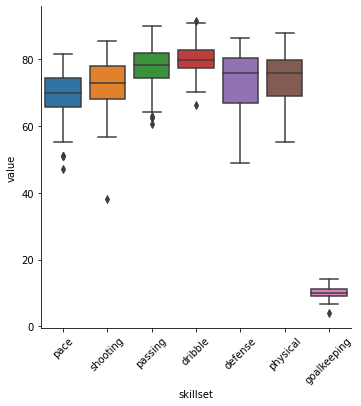

In [16]:
df_cm = get_data_on_spec_position('central_midfielder', 50)
plot_best_skillsets(df_cm)

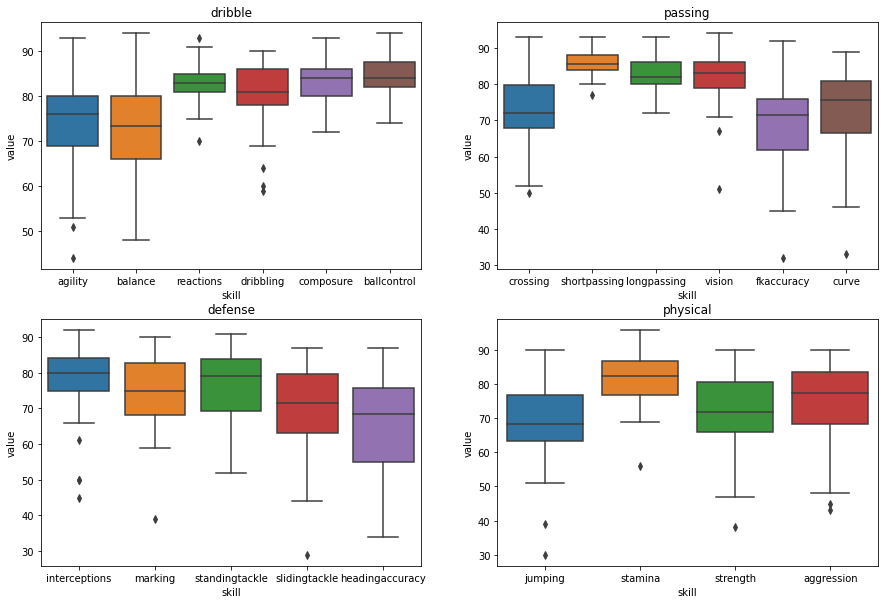

In [17]:
skillset_1 = [dribble, passing, defense, physical]
skillname_1 = ['dribble', 'passing', 'defense', 'physical']

plot_best_skills_2(skillset_1, skillname_1, df_cm)

It seems like what is needed by a central midfielder is almost the same as what a wing back needed. Different from central back, who is really good at defending and physical attributes, central midfielder needs more broader skills, almost like wing back. But they are better at **passing** and **shooting**. Wing back themselves, has better **pace**. 

## Attacking Midfielder

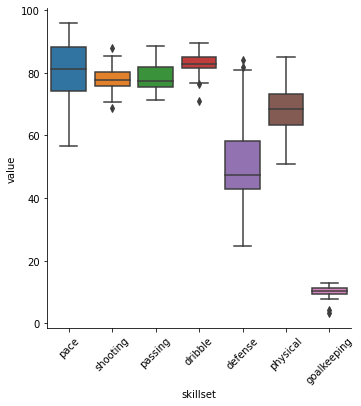

In [18]:
df_am = get_data_on_spec_position('attacking_midfielder', 50)
plot_best_skillsets(df_am)

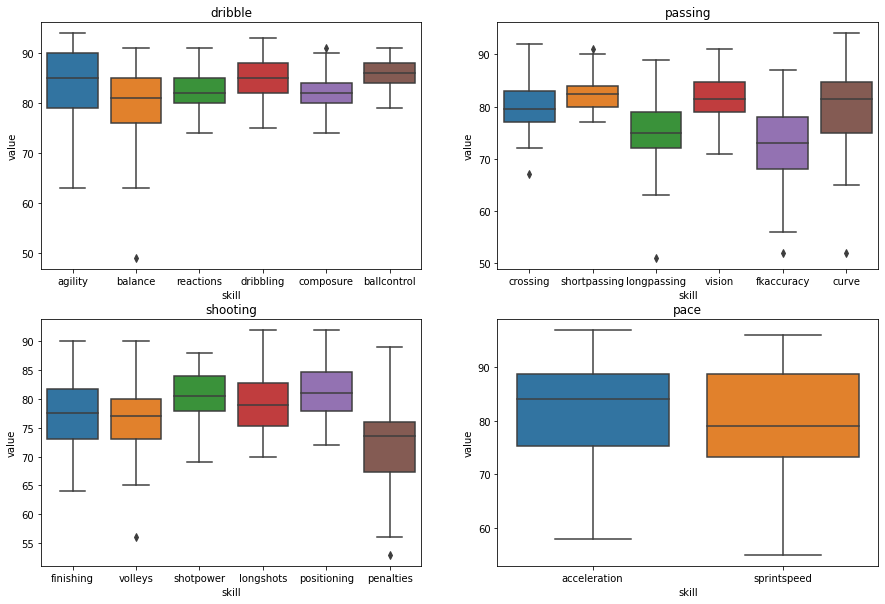

In [19]:
skillset_1 = [dribble, passing, shooting, pace]
skillname_1 = ['dribble', 'passing', 'shooting', 'pace']

plot_best_skills_2(skillset_1, skillname_1, df_am)

For an attacking midfielder position, a player needs to be really good at his **pace, shooting, passing** and **dribble**. It depends on what your character of attack. There are attacking midfielders that are having good pace, really well at accelerating, but there are also attacking midfielders that are slow. 

## Forward

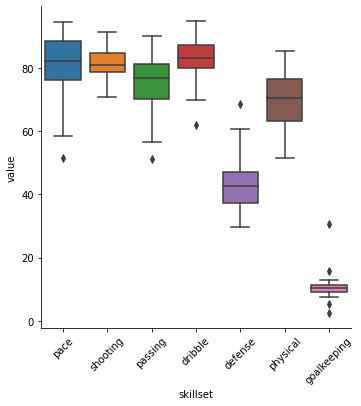

In [20]:
df_f = get_data_on_spec_position('forward', 50)
plot_best_skillsets(df_f)

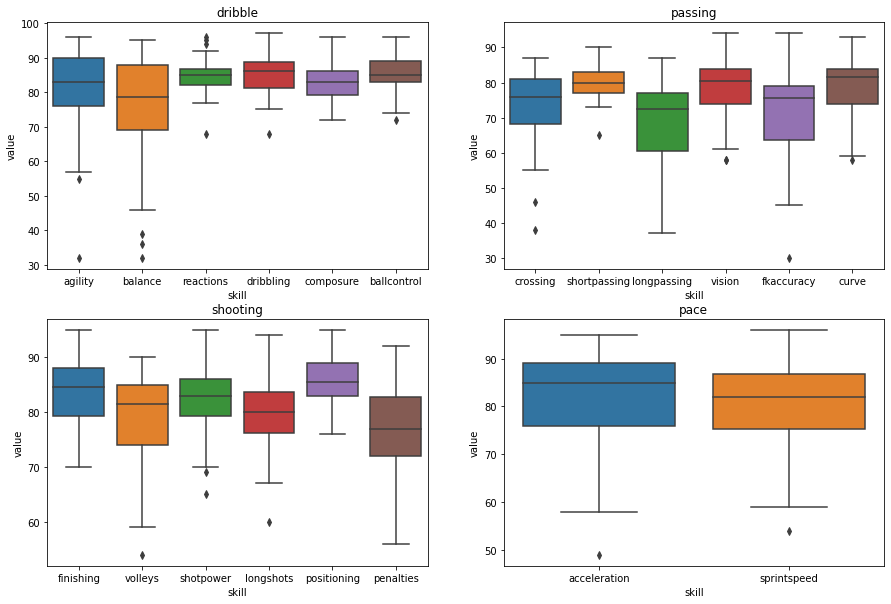

In [21]:
skillset_1 = [dribble, passing, shooting, pace]
skillname_1 = ['dribble', 'passing', 'shooting', 'pace']

plot_best_skills_2(skillset_1, skillname_1, df_f)

For a striker/forward, they have almost the same attribute as attacking midfielder, except they have better **shooting**. Among the position that we have, forward is the position that has the best shooting skills. 

# Model building

In [22]:
df = data[['name', 'age', 'value', 'position', 'spec_position', 'overall', 'potential'] + skills + skill_names]

def change_value(x):
    y = str(x).replace('€', '')
    if y[-1] == 'M':
        outp = float(str(y).replace('M', ''))
    else:
        outp = float(str(y).replace('K', '')) / 1000
    return outp

In [23]:
df['value'] = [change_value(x) for x in df.value]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**In order to find the best potential players, the first thing that we need to do is finding their age**, seeing if their age are young enough to be scouted. There is no meaning if we recruited a player that has potential, already shoowed a decent skills but doesn't have long enough career left anymore. 

**After that, we will see the position they are playing**. Right now, we won't be specific with the position. We only grouped players into 6 positions : 
1. Goalkeeper
2. Central Defender
3. Wing Back
4. Central Midfielder
5. Attacking Midfielder
6. Forward

Central midfielder for example, it can be a defensive midfielder, pure central midfielder, deep lying playmaker etc. It also applied to other group of positions. Because, often times at a player's career they changed their main roles. But, the change most of the times is not going to be too far. So, positions grouping like this is the best way that we can do to group players. 

In [24]:
def finding_talents(position, max_value, n_players):
    df_amf = df[(df.spec_position == position) & (df.value < max_value)]
    df_amf_head = df_amf.sort_values('overall', ascending=False).head(30)

    find_skills = lambda dv, list_skill, n: list(dv[list_skill].mean().sort_values(ascending=False)[:n].index)

    amf_skills = find_skills(df_amf_head, skills, 8)
    amf_skillsets = find_skills(df_amf_head, skill_names, 4)
    
    normalizer = lambda x: (x - 60) / 4

    dw = pd.DataFrame()
    for c in (['potential'] + amf_skills + amf_skillsets):
        dw[c] = [normalizer(x) for x in df_amf[c]]

    dw['age'] = [(25 - x) if x < 25 else 0 for x in df_amf['age']]
    
    scouting_scores = ((np.transpose(dw[amf_skills]).mean() * 1.5) + np.transpose(dw[amf_skillsets]).mean()) * dw['potential'] * dw['age']

    dw['scouting_scores'] = scouting_scores
    best_dw = dw.sort_values('scouting_scores', ascending=False).head(10).index
    output = df_amf.iloc[best_dw]
    
    return output

In [25]:
d_gk = finding_talents(position='goalkeeper', max_value=40, n_players=10)
d_cb = finding_talents(position='central_back', max_value=40, n_players=10)
d_wb = finding_talents(position='wing_back', max_value=40, n_players=10)
d_cm = finding_talents(position='central_midfielder', max_value=40, n_players=10)
d_am = finding_talents(position='attacking_midfielder', max_value=40, n_players=10)
d_fw = finding_talents(position='forward', max_value=40, n_players=10)

d_talents = pd.concat([d_gk, d_cb, d_wb, d_cm, d_am, d_fw])

In [26]:
d_talents

,name,age,value,position,spec_position,overall,potential,crossing,finishing,headingaccuracy,...,gkkicking,gkpositioning,gkreflexes,pace,shooting,passing,dribble,defense,physical,goalkeeping
229,G. Donnarumma,19.0,29.00,gk,goalkeeper,82.0,93.0,12.0,12.0,12.0,...,72.0,78.0,88.0,50.0,16.666667,24.333333,50.000000,17.6,52.00,80.8
734,A. Lafont,19.0,14.00,gk,goalkeeper,78.0,90.0,13.0,6.0,13.0,...,71.0,76.0,80.0,46.5,11.166667,29.500000,43.333333,15.2,50.75,76.6
426,A. Onana,22.0,14.50,gk,goalkeeper,80.0,85.0,15.0,12.0,20.0,...,85.0,75.0,80.0,63.0,16.833333,30.500000,53.333333,15.8,53.75,80.4
18089,H. Benns,18.0,0.04,rw,goalkeeper,50.0,58.0,44.0,49.0,36.0,...,5.0,10.0,5.0,73.0,46.500000,38.000000,55.666667,23.8,38.50,10.0
1763,A. Meret,21.0,12.00,gk,goalkeeper,75.0,89.0,15.0,17.0,19.0,...,66.0,75.0,78.0,44.5,19.333333,21.333333,43.333333,16.8,46.00,73.4
237,Pau López,23.0,21.50,gk,goalkeeper,82.0,87.0,24.0,19.0,15.0,...,79.0,83.0,81.0,48.5,20.000000,34.833333,44.500000,16.2,50.25,81.2
1865,M. Maignan,22.0,7.50,gk,goalkeeper,75.0,83.0,18.0,13.0,17.0,...,72.0,76.0,76.0,43.5,16.166667,26.833333,44.500000,17.2,48.25,74.2
2914,W. Faríñez,20.0,5.00,gk,goalkeeper,73.0,83.0,18.0,20.0,17.0,...,69.0,74.0,77.0,48.5,19.333333,28.666667,45.833333,18.2,47.75,72.6
180,J. Pickford,24.0,25.00,gk,goalkeeper,83.0,88.0,17.0,19.0,15.0,...,88.0,81.0,86.0,48.5,23.666667,38.166667,52.666667,17.4,54.25,83.2
177,Kepa,23.0,28.50,gk,goalkeeper,83.0,91.0,25.0,11.0,17.0,...,76.0,80.0,84.0,33.5,17.833333,32.000000,41.333333,18.2,44.25,80.8


Now, we have our best 60 talents